In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split ,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=pd.read_csv('/content/mission 4.csv')
data.head(10)

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,Acer,Intel Core i5,16,256,17.3,macOS,1808.865225
1,Acer,Intel Core i7,32,2048,13.3,macOS,2020.923055
2,Apple,AMD Ryzen 5,32,512,17.3,Linux,1152.453189
3,HP,AMD Ryzen 5,8,512,15.6,macOS,1884.457406
4,Lenovo,AMD Ryzen 7,64,256,17.3,macOS,2780.779164
5,Apple,Intel Core i7,64,512,17.3,macOS,1462.717914
6,Lenovo,Intel Core i5,16,2048,17.3,Windows,2020.716008
7,HP,AMD Ryzen 5,16,1024,17.3,macOS,2272.791695
8,HP,AMD Ryzen 7,64,256,15.6,Linux,1275.023449
9,Lenovo,Intel Core i7,64,2048,14.0,Windows,2163.024487


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 1000 non-null   object 
 1   Processor Type        1000 non-null   object 
 2   RAM Size (GB)         1000 non-null   int64  
 3   Storage (GB)          1000 non-null   int64  
 4   Screen Size (inches)  1000 non-null   float64
 5   Operating System      1000 non-null   object 
 6   Price ($)             1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [ ]:
data.isna().sum()

,0
Brand,0
Processor Type,0
RAM Size (GB),0
Storage (GB),0
Screen Size (inches),0
Operating System,0
Price ($),0


In [ ]:
data.describe()

,RAM Size (GB),Storage (GB),Screen Size (inches),Price ($)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.192000,978.432000,15.090700,1752.871053
std,21.724527,705.925276,1.563319,671.389528
min,8.000000,256.000000,13.300000,389.808247
25%,14.000000,512.000000,13.300000,1233.948071
50%,16.000000,512.000000,15.600000,1738.449367
75%,64.000000,2048.000000,17.300000,2215.303742
max,64.000000,2048.000000,17.300000,3117.210896


In [ ]:
le={}
encoded=['Brand','Processor Type','Operating System']
for col in encoded:
  le[col]=LabelEncoder()
  data[col]=le[col].fit_transform(data[col])

In [ ]:
scall=['RAM Size (GB)','Storage (GB)','Screen Size (inches)']
sc=StandardScaler()
data[scall]=sc.fit_transform(data[scall])

In [ ]:
data

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,0,2,-0.653598,-1.023895,1.413918,2,1808.865225
1,0,3,0.083266,1.515887,-1.146020,2,2020.923055
2,1,0,0.083266,-0.661069,1.413918,0,1152.453189
3,3,0,-1.022029,-0.661069,0.325944,2,1884.457406
4,4,1,1.556992,-1.023895,1.413918,2,2780.779164
...,...,...,...,...,...,...,...
995,4,2,-1.022029,-0.661069,0.325944,0,941.038821
996,2,2,0.083266,1.515887,0.325944,1,1157.272102
997,3,0,1.556992,0.064583,0.325944,2,1826.347859
998,0,0,0.083266,1.515887,0.325944,0,1315.125592


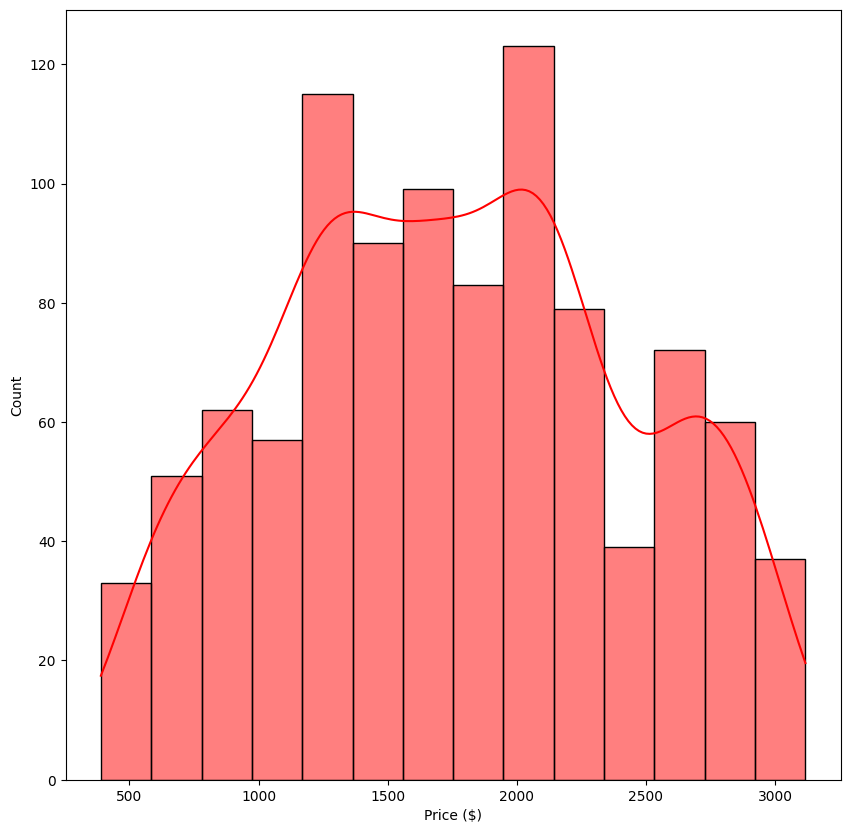

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data['Price ($)'],color='red',kde=True)
plt.title=("distibation")
plt.xlabel=("price")
plt.y_label=('freqancy')

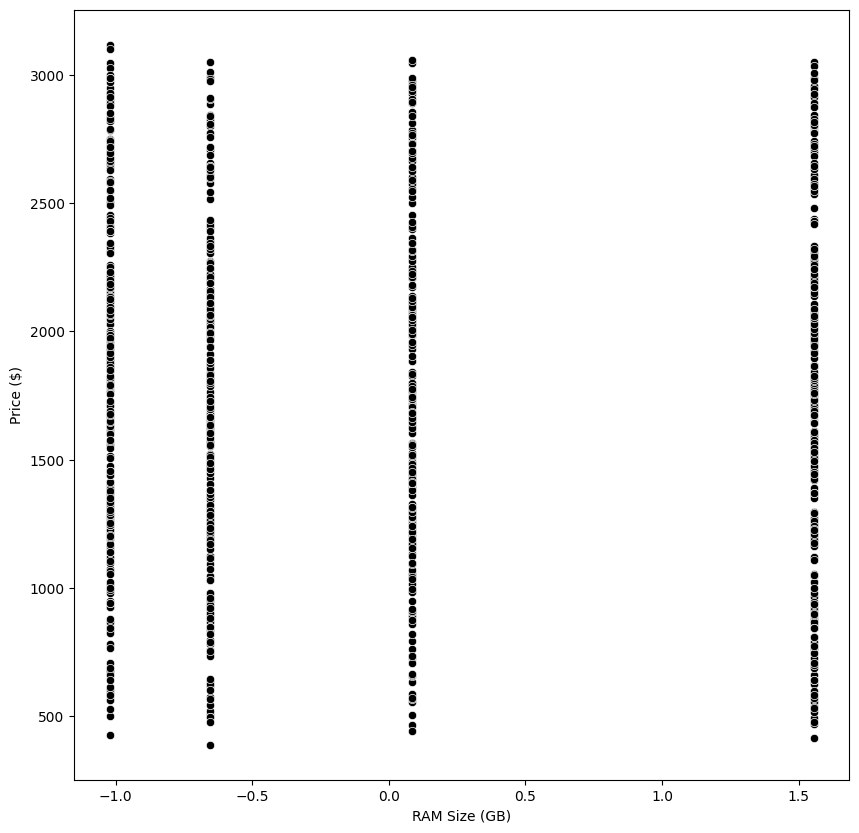

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['RAM Size (GB)'],y=data['Price ($)'],color='black')
plt.title=("distibatre;ation between ram and price ion")
plt.xlabel=("ram")
plt.y_label=('price')

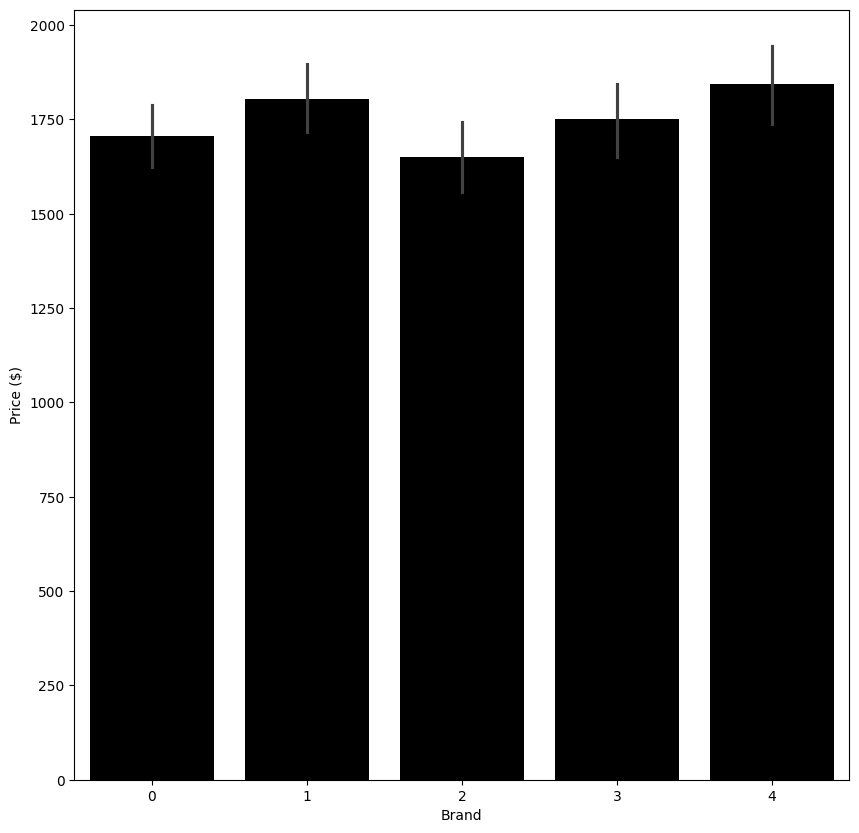

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Brand'],y=data['Price ($)'],color='black')
plt.title=("impact brand in price ")
plt.xlabel=("brand")
plt.y_label=('price')

In [ ]:
x=data.drop('Price ($)',axis=1)
y=data['Price ($)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
lr=LinearRegression()

de=DecisionTreeRegressor()
ra=RandomForestRegressor()


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
de.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
ra.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_lr=lr.predict(x_test)
y_pred_de=de.predict(x_test)
y_pred_ra=ra.predict(x_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred_lr))
print("MSE",mean_squared_error(y_test,y_pred_lr))
print("r2_score",r2_score(y_test,y_pred_lr))

MAE 566.2744459316656
MSE 459090.8989545152
r2_score 0.05026750906647026


In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred_de))
print("MSE",mean_squared_error(y_test,y_pred_de))
print("r2_score",r2_score(y_test,y_pred_de))

MAE 496.7036971014705
MSE 556170.278364699
r2_score -0.15056296053220874


In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred_ra))
print("MSE",mean_squared_error(y_test,y_pred_ra))
print("r2_score",r2_score(y_test,y_pred_ra))

MAE 463.4928150437554
MSE 376512.44796251453
r2_score 0.22109955591529162


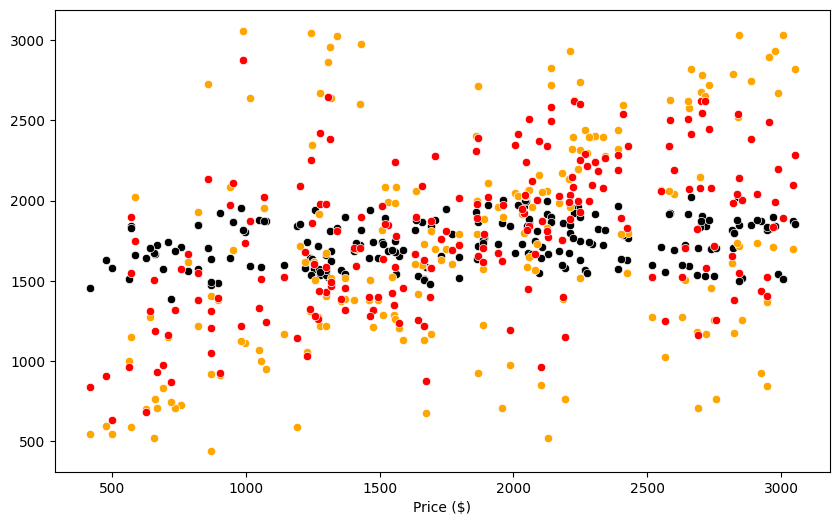

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred_lr,color='black')
sns.scatterplot(x=y_test,y=y_pred_de,color='orange')
sns.scatterplot(x=y_test,y=y_pred_ra,color='red')



plt.show()

In [ ]:
grid_params={
    'max_depth':[10,20,30,40,50],
    'max_leaf_nodes':[20,30,40,50,60]
}
grid_model=GridSearchCV(de,grid_params,cv=5)
grid_model.fit(x_train,y_tain)
grid_model.best_params_

{'max_depth': 10, 'max_leaf_nodes': 30}

In [ ]:
y_pred_grid=grid_model.best_estimator_.predict(x_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred_grid))
print("MSE",mean_squared_error(y_test,y_pred_grid))
print("r2_score",r2_score(y_test,y_pred_grid))

MAE 493.7752741053469
MSE 391905.000100667
r2_score 0.18925660952431955


In [ ]:
random_params={
    'max_depth':[10,20,30,40,50],
    'n_estimators':[100,200,300,400,500]


}
random_model=RandomizedSearchCV(ra,random_params,cv=5)
random_model.fit(x_train,y_tain)
random_model.best_params_

{'n_estimators': 100, 'max_depth': 10}

In [ ]:
y_pred_random=random_model.best_estimator_.predict(x_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred_random))
print("MSE",mean_squared_error(y_test,y_pred_random))
print("r2_score",r2_score(y_test,y_pred_random))

MAE 463.0866652024405
MSE 370443.4181051887
r2_score 0.23365470535753552


In [ ]:
pip install gradio

In [ ]:
import gradio as gr

In [ ]:
data.columns

Index(['Brand', 'Processor Type', 'RAM Size (GB)', 'Storage (GB)',
       'Screen Size (inches)', 'Operating System', 'Price ($)'],
      dtype='object')

In [ ]:
def labtop_price(Brand,Processor_Type,RAM_Size,Storage,Screen_Size,Operating_System):
  try:
    input_data=pd.DataFrame({
        'Brand':[Brand],
        'Processor Type':[Processor_Type],
        'RAM Size (GB)':[RAM_Size],
        'Storage (GB)':[Storage],
        'Screen Size (inches)':[Screen_Size],
        'Operating System':[Operating_System]
        })
    for col in encoded:
      input_data[col]=le[col].transform(input_data[col])
    input_data[scall]=sc.transform(input_data[scall])
    predication=ra.predict(input_data)
    return f"labtob_house_price: ${predication[0]:,.2f}"
  except Exception as e:
   return str(e)
gr.Interface(
    fn=labtop_price,
    inputs=[
    gr.Dropdown(['Acer','Apple','Dell','HP','Lenovo'],label='Brand'),
    gr.Dropdown(['AMD Ryzen 5','AMD Ryzen 7','Intel Core i5','Intel Core i7'],label='Processor Type'),
    gr.Number(label='RAM Size (GB)'),
    gr.Number(label='Storage (GB)'),
    gr.Number(label='Screen Size (inches)'),
    gr.Dropdown(['Linux','macOS','Windows'],label='Operating System')
    ],
    outputs=gr.Textbox(label='predication'),
    title="predicted house price"









).launch()





It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7c9c9ed97ce4633b61.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
